# Table of Contents
1. Problem Statement
2. Project Objective
3. Data Description
4. Data Pre-processing
5. Model building
6. Model Evaluation
7. Hyperparameter Tunning
8. Inferences

# 1. Problem Statement :
An individual's annual income from various factors. It is infulenced by the individual's education, age, gender, occupation and various other factors. The given data set contains data on various factors as mentioned previously. The records here are categorised in two income types as having income less than or equal to 50 thousand (<=50k) and income more than 50 thousand (>50k). 

# 2. Project Objective :
   The objective is to determine the person's income based on the data.

# 3. Data Description: 
Below are the attributes of data set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import urllib.request
%matplotlib inline

# Importing data set

In [2]:
adult= pd.read_csv('adult.csv',skipinitialspace=True)

In [3]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Renaming columns

In [4]:
adult=adult.rename(columns = {'educational-num':'education_num','marital-status':'marital_status','capital-gain':'capital_gain','capital-loss':'capital_loss','hours-per-week':'hours_per_week','native-country':'native_country'})

In [5]:
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# 4. Data Pre-processing
In this data set it is observed that instead of null values there are '?' in few columns. The first task will be to to identify the magnitude of such data and then subsequently processing it.

In [6]:
adult.shape

(48842, 15)

In [7]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
adult.isin(['?']).sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

In [9]:
# Calculating amount of total rows having "?" i.e. null values
nulls=adult.isin(['?']).sum().sum()/adult.shape[0]*100
print("Total rows having '?': ", nulls,"%")

Total rows having '?':  13.236558699479955 %


In [10]:
col_list = list(adult.columns)

In [11]:
for col in col_list:
    print(col)
    print(adult[col].dtypes)
    print(adult[col].unique())
    print('\n')

age
int64
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]


workclass
object
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


fnlwgt
int64
[226802  89814 336951 ... 129912 255835 257302]


education
object
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


education_num
int64
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]


marital_status
object
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


occupation
object
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-manageri

# replacing '?' values with mean and mode for continuous and categorical columns respectively

In [12]:
adult.isin(['?']).sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

In [13]:
for col in col_list:
    if (adult[col].dtypes=='int'):
        adult[col]=adult[col].replace(['?'],adult[col].mean())
    else:
        adult[col]=adult[col].replace(['?'], adult[col].mode())

In [14]:
# checking for '?'
for col in col_list:
    print(col)
    print(adult[col].dtypes)
    print(adult[col].unique())
    print('\n')

age
int64
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]


workclass
object
['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


fnlwgt
int64
[226802  89814 336951 ... 129912 255835 257302]


education
object
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


education_num
int64
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]


marital_status
object
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


occupation
object
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tec

In [15]:
adult.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# Gender distrubution against income

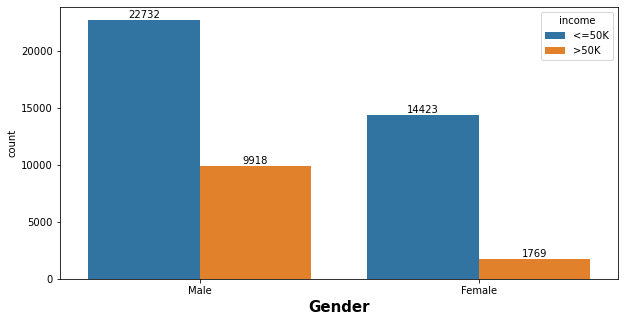

In [16]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='gender', hue='income', data= adult)
for container in ax.containers:
    ax.bar_label(container,size=10)
plt.xlabel('Gender',fontweight='bold', fontsize=15)
plt.show()

# Count of different levels of the “workclass”.

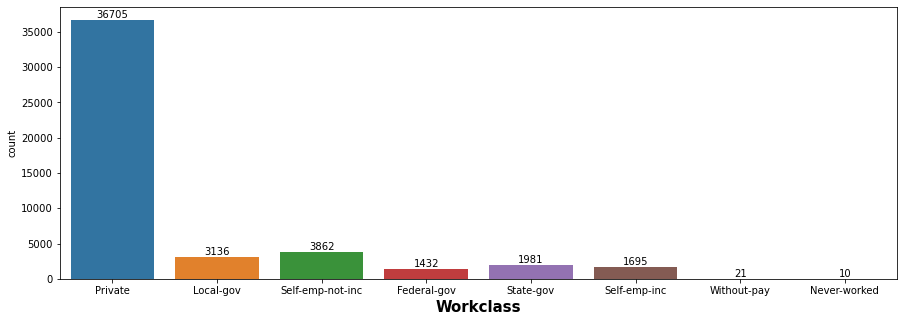

In [17]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='workclass', data= adult)
for container in ax.containers:
    ax.bar_label(container,size=10)
plt.xlabel('Workclass',fontweight='bold', fontsize=15)
plt.show()

<AxesSubplot:xlabel='income', ylabel='hours_per_week'>

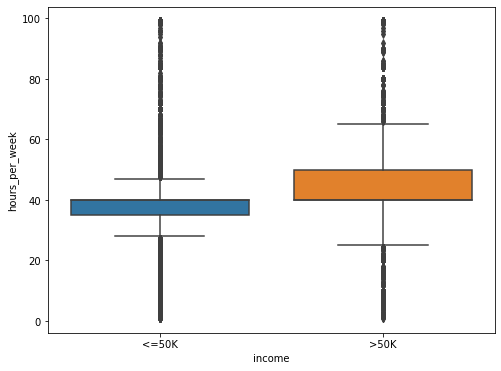

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x='income', y='hours_per_week', data=adult)


<AxesSubplot:xlabel='income', ylabel='age'>

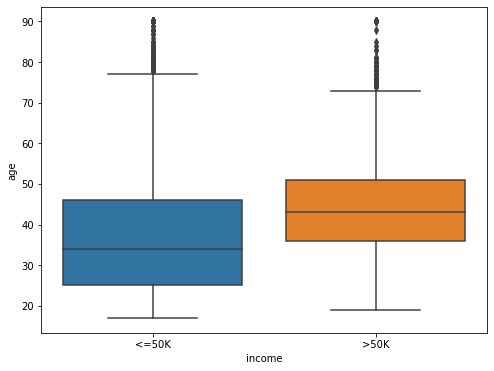

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x='income', y='age', data=adult)


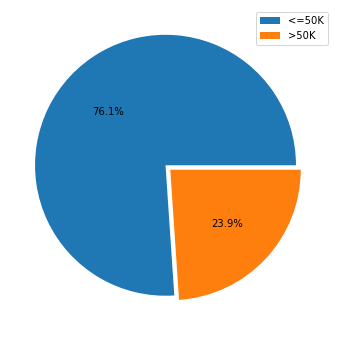

In [20]:
plt.figure(figsize=(6,6))
plt.pie(adult['income'].value_counts(),explode=[0.05,0],autopct='%1.1f%%')
plt.legend(labels=adult['income'].unique())
plt.show()

# labeling for categorical columns

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list:
  if adult[i].dtypes == 'object':
    adult[i]=labelencoder.fit_transform(adult[i])
  elif adult[i].dtypes== 'int':
    adult[i]=adult[i]

In [22]:
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0


# Splitting dataset into independent features and target variables

In [23]:
x = adult.drop(['income'], axis=1)
y = adult['income']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.4, random_state=0)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(19536, 14)
(19536,)
(29306, 14)
(29306,)


# 5. Model Building

In [26]:
from sklearn import tree

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
# Displaying values of parameters of above model
from pprint import pprint
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}


In [30]:
pred = model.predict(x_test)
pred

array([0, 1, 1, ..., 1, 1, 0])

# 6. Model Evaluation
  Model will be evaluated on basis of accuracy.

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
acc= round((accuracy_score(pred, y_test)*100),2)
print('Accuracy: ',acc)

Accuracy:  80.67


# The accuracy thus obtained is 80.67%, further applying Hyperparameter Tunning for improving performance of model.

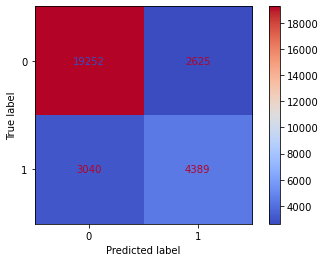

In [32]:
c=confusion_matrix(pred, y_test)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=c)
cm_display.plot(cmap='coolwarm')

# 7. Hyperparameter Tuning for improving model performance

In [33]:
# Creating gid of parametrs and applying Randomized Search CV to get best parameters.
from scipy.stats import randint

param_dist = {"max_depth": [2, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              'min_samples_split': [2,5,10],
              "criterion": ["gini", "entropy"]}

In [34]:
tree = DecisionTreeClassifier(random_state=42)

In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, random_state=42)


In [36]:
tree_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025C04F092E0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025C04F1F430>,
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42)

In [37]:
# best hyperparameters are as below
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

# Creating new model using the above set of hyperparameters

In [38]:
new_model=DecisionTreeClassifier(max_depth=None, max_features=2, min_samples_leaf=6,
                                 min_samples_split=2,
                                 criterion='gini')

In [39]:
new_model.fit(x_train, y_train)

DecisionTreeClassifier(max_features=2, min_samples_leaf=6)

In [40]:
new_pred=new_model.predict(x_test)
new_pred

array([0, 1, 0, ..., 0, 1, 0])

# Evaluating new model for performance

In [41]:
print('Accuracy: ',round((accuracy_score(new_pred, y_test)*100),2))

Accuracy:  84.13


In [42]:
confusion_matrix(new_pred, y_test)

array([[20507,  2865],
       [ 1785,  4149]], dtype=int64)

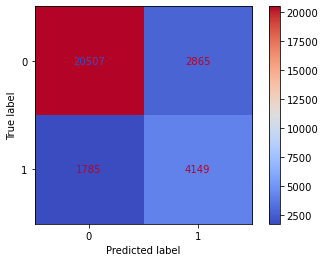

In [43]:
c=confusion_matrix(new_pred, y_test)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=c)
cm_display.plot(cmap='coolwarm')
plt.show()

# 8. Inferences from above result :
The above model gave accuracy of 84.25 with hyperparameter tuning. 